# Book 4 - Modelo XGBoost

Este notebook serviu como registro prático e teórico no meu aprendizado de Machine Learning.

`Enriqueci este notebook com anotações adicionais e aplicações práticas tornando-o uma referência valiosa para consultas e implementações em futuros projetos reais.`

Espero que este material inspire outros a explorar ainda mais o fascinante mundo do Machine Learning. 

Este notebook é centrado no modelo XGBoost, que é baseado nas árvores de decisão. Ele combina o resultado de várias árvores para formar um comitê de decisão robusto, que vem ganhando popularidade e favoritismo nas competições de machine learning devido seu ótimo desempenho.

Tópicos abordados na aplicação do XGBoost:

- **Validação Cruzada**
- **Ajuste Hiperparâmetros**
- **Boosting**
- **Stacking**


Compartilhar conhecimento é uma alegria—viva ao aprendizado contínuo, boa pratica e bons estudo a quem estiver lendo, abraços!

# Funções, bibliotecas e Dataframe ficticios

In [1]:
RANDOM_STATE = 3141592

In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

# Manipulação e Tratamento de dados
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
import requests

# CARREGANDO BASE
arquivo = 'fake_database'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url)
code = response.text
exec(code)
df = fake_database2()
display(df.head())

arquivo = 'funcoes_estatisticas'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url)
code = response.text
exec(code)
print('TUDO OK')

https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/fake_database.py


,x_num0,x_num1,x_num2,x_num3,x_num4,x_num5,x_num6,x_num7,x_num8,x_num9,...,x_bin0,x_bin1,x_bin2,x_bin3,x_bin4,x_cat0,x_cat1,x_cat2,x_cat_0,x_cat_1
0,4.875997,-1.491729,2.491069,1.874948,-0.000381,1.478758,3.972563,0.230329,5.149503,0.595726,...,sim,não,sim,não,sim,A,B,A,C,D
1,3.750108,-0.510656,-0.462908,0.928715,0.496968,-0.995687,2.219878,-1.951839,0.335021,-0.071709,...,não,não,não,sim,não,B,B,C,C,B
2,1.915908,2.793605,2.989653,1.743696,-0.213394,-0.274895,0.106642,1.605156,2.169961,-1.126328,...,sim,sim,sim,não,sim,C,A,C,B,C
3,3.575351,2.779022,4.928382,3.046386,-1.832086,-2.961492,1.171947,1.044997,3.281876,-1.733729,...,não,não,não,sim,não,B,A,A,D,D
4,4.812294,0.316227,0.704474,0.908321,0.050424,-2.080064,2.597434,-1.643092,-0.138313,-1.498914,...,sim,não,não,não,não,A,B,A,D,B


https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/funcoes_estatisticas.py
TUDO OK


In [4]:
# Variavel Dependente
var_dep = 'y'
y = df[var_dep]
display(y.head())

x = df.drop('y', axis=1)
display(x.head())

0    0
1    1
2    0
3    1
4    1
Name: y, dtype: object

,x_num0,x_num1,x_num2,x_num3,x_num4,x_num5,x_num6,x_num7,x_num8,x_num9,x_bin0,x_bin1,x_bin2,x_bin3,x_bin4,x_cat0,x_cat1,x_cat2,x_cat_0,x_cat_1
0,4.875997,-1.491729,2.491069,1.874948,-0.000381,1.478758,3.972563,0.230329,5.149503,0.595726,sim,não,sim,não,sim,A,B,A,C,D
1,3.750108,-0.510656,-0.462908,0.928715,0.496968,-0.995687,2.219878,-1.951839,0.335021,-0.071709,não,não,não,sim,não,B,B,C,C,B
2,1.915908,2.793605,2.989653,1.743696,-0.213394,-0.274895,0.106642,1.605156,2.169961,-1.126328,sim,sim,sim,não,sim,C,A,C,B,C
3,3.575351,2.779022,4.928382,3.046386,-1.832086,-2.961492,1.171947,1.044997,3.281876,-1.733729,não,não,não,sim,não,B,A,A,D,D
4,4.812294,0.316227,0.704474,0.908321,0.050424,-2.080064,2.597434,-1.643092,-0.138313,-1.498914,sim,não,não,não,não,A,B,A,D,B


In [5]:
# DUMMYRIZAÇÃO
colunas_categoricas = []
colunas_binarias = []
colunas_mais3_categorias = []

for coluna in x.columns:
    if df[coluna].dtype == 'O':
        categorias = x[coluna].unique()
        if len(categorias) == 2:
            print('2 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_binarias.append(coluna)
        else:
            print('3 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_mais3_categorias.append(coluna)

############################################################################################
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder #transformando colunas com 2 categorias em 0 e 1

coluna = x.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'), #caso a coluna tenha apenas 2 categorias 
    colunas_categoricas), #passando quais são essas colunas
    remainder = 'passthrough', sparse_threshold=0) #oque deve ser feito com as outras

#Aplicando transformação
x = one_hot.fit_transform(x)

#Os novos nomes das colunas #'onehotencoder=transformadas; 'remainder'=não transformadas
novos_nomes_colunas = one_hot.get_feature_names_out(coluna)

x = pd.DataFrame(x, columns = novos_nomes_colunas) #alterando de volta
x_columns = x.columns.tolist() 

############################################################################################
# NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
x = normalizacao.fit_transform(x)

#df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()
#df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

############################################################################################
# DEFININDO A VARIAVEL DEPENDENTE
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

############################################################################################
#backups
x_inteiro = x
y_inteiro = y

# DIVIDINDO BASE EM TREINO E TESTE
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                    stratify = y, #para manter a proporção da Var Dep nos splits
                                                    random_state = 5) #raiz da aleatoridade
# test_size = 0.25 #porcentagem que ira ser separado para testes

print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

2 niveis: x_bin0 => ['sim' 'não']
2 niveis: x_bin1 => ['não' 'sim']
2 niveis: x_bin2 => ['sim' 'não']
2 niveis: x_bin3 => ['não' 'sim']
2 niveis: x_bin4 => ['sim' 'não']
3 niveis: x_cat0 => ['A' 'B' 'C']
3 niveis: x_cat1 => ['B' 'A' 'C']
3 niveis: x_cat2 => ['A' 'C' 'B']
3 niveis: x_cat_0 => ['C' 'B' 'D' 'A']
3 niveis: x_cat_1 => ['D' 'B' 'C' 'A']
(750, 32) (250, 32)
(750,) (250,)


In [6]:
# Função para avaliação de modelos exibindo metricas de avaliação
import requests
arquivo = 'ML_supervised_learning'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url)
code = response.text
exec(code)

https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/ML_supervised_learning.py


# =======================================

# Aplicação basica do modelo

In [7]:
import xgboost as xgb

In [8]:
# Definindo os parâmetros do modelo. Neste caso, estamos utilizando o objetivo 'binary:logistic',
# o que significa que o problema é de classificação binária, onde o modelo prevê probabilidades de uma classe binária.
modelo_xgb = xgb.XGBClassifier(
    objective='binary:logistic' 
    # Problema de classificação binária.
    # é para que o modelo atribua valores de probabilidade para as classes
    )
modelo_xgb.fit(x_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

O parâmetro `objective` no XGBoost define a função de perda (loss function) usada para treinar o modelo, ou seja, ele especifica o tipo de tarefa de aprendizado que você deseja resolver.

No caso de `binary:logistic`, ele é utilizado para **classificação binária**. Esse objetivo pressupõe que o problema envolve duas classes e, portanto, treina o modelo para prever a probabilidade de uma instância pertencer à classe "1" (classe positiva), aplicando uma função logística (sigmoide) para transformar as saídas do modelo em probabilidades no intervalo [0, 1]. O resultado é a probabilidade associada à classe positiva.

Quando você faz a predição com o modelo treinado, ele retorna um valor de probabilidade, e você pode definir um limiar para classificar as instâncias como pertencentes à classe 0 ou 1 (por exemplo, atribuir à classe 1 se a probabilidade for maior que 0,5).

#### *Opções para o parâmetro `objective` no XGBoost*

O parâmetro **`objective`** no XGBoost define a função de perda que será minimizada durante o treinamento, ou seja, a natureza do problema que o modelo está resolvendo (classificação binária, regressão, multiclass, etc.). Abaixo estão as principais opções para o parâmetro `objective`.

*1. Objetivos para Classificação Binária:*
- **`binary:logistic`**: Realiza classificação binária e gera probabilidades como saída (valores entre 0 e 1).
- **`binary:hinge`**: Realiza classificação binária utilizando a perda de hinge, que é semelhante à usada no SVM. A saída será 0 ou 1 (em vez de probabilidades).

*2. Objetivos para Classificação Multiclasse:*
- **`multi:softmax`**: Realiza classificação multiclasse e retorna a classe prevista diretamente como saída (sem probabilidades). O número de classes é especificado com o parâmetro `num_class`.
- **`multi:softprob`**: Realiza classificação multiclasse, mas retorna a distribuição de probabilidades para cada classe como saída. O número de classes também é especificado com o parâmetro `num_class`.

*3. Objetivos para Regressão:*
- **`reg:squarederror`**: Regressão utilizando o erro quadrático (Mean Squared Error, ou MSE). É a função de perda mais comum para regressão.
- **`reg:squaredlogerror`**: Regressão utilizando o erro quadrático logarítmico (Squared Logarithmic Error). Útil quando os alvos variam em várias ordens de magnitude.
- **`reg:logistic`**: Regressão logística. A saída é probabilística (valores entre 0 e 1).
- **`reg:pseudohubererror`**: Usa a função de erro de Huber, que é robusta a outliers. Combina propriedades da MAE e MSE.

*4. Objetivos para Rankeamento (Ranking):*
- **`rank:pairwise`**: Utilizado para problemas de rankeamento. Classifica pares de exemplos com base na ordem relativa.
- **`rank:ndcg`**: Maximiza a métrica Normalized Discounted Cumulative Gain (NDCG) para ranqueamento.
- **`rank:map`**: Maximiza a métrica Mean Average Precision (MAP) para ranqueamento.

*5. Outros Objetivos:*
- **`count:poisson`**: Regressão para contagem de eventos, onde o alvo segue uma distribuição de Poisson.
- **`survival:cox`**: Cox Proportional Hazards para modelagem de sobrevivência.
- **`reg:gamma`**: Regressão com erro Gamma, útil para modelar variáveis positivas com alta assimetria.
- **`reg:tweedie`**: Tweedie regression, apropriada para modelagem de distribuições compostas de Poisson e Gamma.

## Avaliando modelo basico

**********************************************************************
Matriz de Confusão:  :

[[119  11]
 [  5 115]]
**************************************************
Relatório de Classificação:  :

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       130
           1       0.91      0.96      0.93       120

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

**********************************************************************


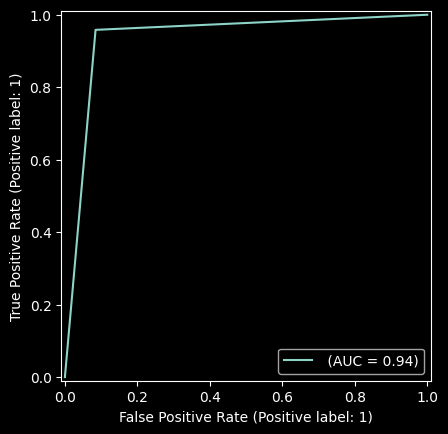

In [9]:
preds = modelo_xgb.predict(x_teste)
avaliar_modelo(preds, y_teste, plotar_grafico=True)

# plotando grafico de uma das arvores

import matplotlib.pyplot as plt

Configure o tamanho da figura e a resolução
plt.figure(figsize=(15, 5), dpi=300)  # Ajuste o tamanho e a resolução conforme necessário

Plotar a árvore
xgb.plot_tree(modelo_xgb, 
              num_trees=1, # modelo N a ser visualizado
              ax=plt.gca())
plt.show()

# Validação Cruzada

#### *Opções para o parâmetro `metrics` no XGBoost*

O parâmetro **`metrics`** no XGBoost especifica a métrica usada para avaliar o desempenho do modelo durante o treinamento e validação. Existem várias opções de métricas, dependendo do tipo de problema que você está resolvendo (classificação binária, multiclasse, regressão, etc.). Abaixo estão as principais métricas disponíveis.

*1. Métricas para Classificação Binária:*
- **`error`**: Taxa de erro, que é a proporção de previsões incorretas.
- **`logloss`**: Logarithmic Loss (ou Binary Cross-Entropy), que mede a incerteza das previsões, penalizando previsões incorretas com maior intensidade.
- **`auc`**: Área sob a curva ROC, que mede a capacidade do modelo em classificar corretamente as classes.
- **`aucpr`**: Área sob a curva Precision-Recall, útil quando as classes estão desbalanceadas.
- **`map`**: Mean Average Precision, que mede a precisão média ponderada para problemas de classificação com múltiplos rótulos.

*2. Métricas para Classificação Multiclasse:*
- **`merror`**: Taxa de erro para classificação multiclasse.
- **`mlogloss`**: Logarithmic Loss para problemas multiclasse.
- **`auc`**: Área sob a curva ROC para o caso multiclasse, onde é calculada uma curva ROC para cada classe.

*3. Métricas para Regressão:*
- **`rmse`**: Root Mean Squared Error (Erro Quadrático Médio), que mede o erro médio entre as previsões e os valores reais.
- **`mae`**: Mean Absolute Error (Erro Absoluto Médio), que mede o erro médio absoluto entre previsões e valores reais.
- **`rmsle`**: Root Mean Squared Logarithmic Error, semelhante ao RMSE, mas calcula o erro sobre o logaritmo das previsões.
- **`mape`**: Mean Absolute Percentage Error, que mede o erro médio percentual absoluto.
- **`mphe`**: Mean Pseudo Huber Error, que é uma função de erro robusta que combina as propriedades da MAE e RMSE, sendo menos sensível a outliers.

*4. Métricas para Rankeamento (Ranking):*
- **`ndcg`**: Normalized Discounted Cumulative Gain, usada para avaliar a relevância em problemas de ranqueamento.
- **`map`**: Mean Average Precision, usada também para ranqueamento.

*5. Avaliação Customizada:*
Você também pode definir suas próprias métricas personalizadas, passando uma função que receba as previsões e os valores reais e retorne um valor para a métrica customizada.

In [10]:
# Criando um objeto DMatrix a partir dos dados de entrada (x) e dos rótulos (y).
# DMatrix é uma estrutura de dados otimizada para trabalhar com o algoritmo XGBoost,
# que facilita a manipulação eficiente de grandes quantidades de dados.
dmatrix = xgb.DMatrix(data=x, label=y)

# Definindo os parâmetros do modelo. Neste caso, estamos utilizando o objetivo 'binary:logistic',
# o que significa que o problema é de classificação binária, onde o modelo prevê probabilidades de uma classe binária.
params = {'objective': 'binary:logistic'}  # Problema de classificação binária.

# Realizando a validação cruzada (cross-validation) com o XGBoost.
cv_resultados = xgb.cv(dtrain=dmatrix,        # dtrain é o conjunto de treinamento que será passado como DMatrix.
                       params=params,        # Os parâmetros definidos anteriormente (objetivo de classificação binária).
                       nfold=3,              # O número de folds (partições) para a validação cruzada. Aqui são 3 folds.
                       num_boost_round=5,    # Número de rounds de boosting. O modelo será treinado por 5 iterações. (numero de arvores)
                       metrics='error',      # Métrica de desempenho. Aqui está sendo usada a 'error', que mede a taxa de erro (1 - acurácia).
                       as_pandas=True,       # Definido como True para retornar os resultados em um DataFrame do Pandas.
                       seed=123)             # Definindo uma semente aleatória para garantir a reprodutibilidade dos resultados.

# Exibindo os resultados da validação cruzada.
print(cv_resultados)
acuracia = 1 - cv_resultados['train-error-mean'].iloc[-1]
print('Acuracia:', acuracia.round(4))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.080996         0.006076         0.179991        0.014802
1          0.049004         0.006198         0.168980        0.017003
2          0.033002         0.002470         0.133984        0.013327
3          0.017997         0.004889         0.122991        0.010578
4          0.011498         0.003076         0.115990        0.014068
Acuracia: 0.9885


Agora nosso objetivo será verificar se aumentar o número de rodadas de reforço faz com que o modelo melhore, e, consequentemente, a acurácia.

In [11]:
params = {'objective': 'binary:logistic'}

cv_resultados = xgb.cv(dtrain=dmatrix, params=params, nfold=3, 
                       num_boost_round=50, #**********
                       metrics='error',
                       as_pandas=True, seed=123)

print(cv_resultados) 
acuracia = 1 - cv_resultados['test-error-mean'].iloc[-1]
print('Acuracia:', acuracia.round(4))

    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.080996         0.006076         0.179991        0.014802
1           0.049004         0.006198         0.168980        0.017003
2           0.033002         0.002470         0.133984        0.013327
3           0.017997         0.004889         0.122991        0.010578
4           0.011498         0.003076         0.115990        0.014068
5           0.007998         0.002545         0.116988        0.009650
6           0.005999         0.001221         0.101985        0.015198
7           0.003000         0.001224         0.097007        0.009974
8           0.002000         0.000706         0.096006        0.013017
9           0.002000         0.000706         0.086008        0.013551
10          0.002000         0.000706         0.089008        0.015805
11          0.001499         0.001224         0.086997        0.013633
12          0.000500         0.000707         0.084998        0.012328
13    

aumentar o número de rodadas não melhorou a acurácia. Vamos entender o motivo.

Analisando o retorno gerado, notamos que muitas linhas estão com valor igual a 0. A partir da 14ª, porque a contagem começa em 0, já temos um desvio padrão igual a 0, e o valor do erro do nosso treino também está bem baixo, e depois fica 0 na rodada seguinte.

Enfrentando um problema de overfitting
Só temos 0 depois disso, ou seja, o modelo está decorando tudo para os dados de treino e acertando tudo, não estamos tendo erros, e isso é ruim. Não queremos que isso aconteça, porque isso é um sinal de overfitting.

Se olharmos para os dados de teste, vamos verificar algo muito curioso. Até a 14ª rodada, temos um valor de erro de 0,20, depois esse erro aumenta para 0,21 na 16ª rodada, depois cai novamente para 0,20 e fica mais ou menos a mesma coisa.

Então isso não está melhorando o nosso modelo, não foi algo positivo. Precisamos de uma quantidade de rodadas de reforço suficiente para que não ocorra overfitting e também que os nossos dados de teste tenham uma melhora e não fiquem estagnados.

# Early Stopping
Existe uma técnica que podemos usar com o XGBoost para saber qual é o número ideal de rodadas de reforço. Esta técnica se chama Early Stopping (Parada Antecipada).

Podemos colocar qualquer valor de Boost Round, 100, 200, mas se definirmos o Early Stopping com um número mais baixo, ele vai parar quando for o momento certo. Ele vai perceber: "O teste não está melhorando, então podemos parar agora". Vamos aplicar essa técnica para entender como isso acontece.

Vamos usar o mesmo código, copiá-lo e colá-lo na próxima célula, e agora vamos jogar um valor alto. Vamos colocar num_boost_round igual a 100, e adicionar o Early Stopping: early_stop_round = 5.

In [12]:
params = {'objective': 'binary:logistic'}

cv_resultados = xgb.cv(dtrain=dmatrix, params=params, nfold=3, 
                       num_boost_round=100, #**********
                       early_stopping_rounds= 5,
                       metrics='error',
                       as_pandas=True, seed=123)

print(cv_resultados) 
acuracia = 1 - cv_resultados['test-error-mean'].iloc[-1]
print('Acuracia:', acuracia.round(4))

    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.080996         0.006076         0.179991        0.014802
1           0.049004         0.006198         0.168980        0.017003
2           0.033002         0.002470         0.133984        0.013327
3           0.017997         0.004889         0.122991        0.010578
4           0.011498         0.003076         0.115990        0.014068
5           0.007998         0.002545         0.116988        0.009650
6           0.005999         0.001221         0.101985        0.015198
7           0.003000         0.001224         0.097007        0.009974
8           0.002000         0.000706         0.096006        0.013017
9           0.002000         0.000706         0.086008        0.013551
10          0.002000         0.000706         0.089008        0.015805
11          0.001499         0.001224         0.086997        0.013633
12          0.000500         0.000707         0.084998        0.012328
13    

Quando definimos o número de early_stopping_rounds, ele costuma dar algumas rodadas a mais para conferir se o resultado está consistente, se realmente não há uma melhora. Se não tiver, ele vai parar, mas pode ir um pouquinho além do número que colocamos.

# *Hiperparâmetros do Modelo XGBoost*
fonte: [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/parameter.html)

O XGBoost (eXtreme Gradient Boosting) é um algoritmo avançado de aprendizado de máquina para problemas de regressão, classificação e ranking, conhecido por sua eficiência e desempenho. Os hiperparâmetros no XGBoost são essenciais para ajustar o modelo para obter a melhor performance possível. Aqui estão as principais categorias e hiperparâmetros utilizados no XGBoost:

*1. Parâmetros Gerais*
Estes parâmetros guiam a funcionalidade geral do XGBoost:
- **`booster`**: Tipo de modelo a ser rodado. Opções incluem `gbtree`, `gblinear` ou `dart`. (Padrão: `gbtree`)
- **`verbosity`**: Nível de verbosidade da saída impressa. Valores possíveis são 0 (silencioso), 1 (erro), 2 (informação) e 3 (depuração). (Padrão: 1)

*2. Parâmetros de Booster*
*Para `gbtree` e `dart`:*
- **`eta`** (ou `learning_rate`): Taxa de aprendizado, usado para prevenir o sobreajuste. (Padrão: 0.3)
    - Determina o quanto o modelo se ajusta à taxa de erro residual. Valores menores significam um aprendizado mais lento e mais robusto.
    - Desempenha um papel crucial no ajuste do modelo ao erro residual com modelos base adicionais.
    - O valor padrão é 0.3, mas pode ser ajustado entre 0 e 1.
    - Taxas de aprendizado mais baixas requerem mais iterações para alcançar a mesma redução de erro, enquanto taxas mais altas podem acelerar o processo.

- **`gamma`** (ou `min_split_loss`): Mínimo de redução de perda necessária para fazer uma divisão adicional em um nó da árvore. (Padrão: 0)
    - Define a redução mínima de perdas necessária para realizar uma partição adicional em um nó da árvore.
    - O padrão é 0, mas pode ser definido como qualquer inteiro positivo.
    - Um valor mais alto torna o algoritmo mais conservador, resultando em menos divisões na árvore.

- **`max_depth`**: Profundidade máxima de uma árvore. (Padrão: 6)
    - Define a profundidade máxima da árvore. Aumentá-la pode tornar o modelo mais complexo e propenso ao overfitting.
    - Afeta a profundidade máxima que cada árvore pode atingir em cada rodada de impulso.
    - O valor padrão é 6, mas pode ser definido como qualquer inteiro positivo.
    - Aumentar a profundidade pode levar a um modelo mais complexo e potencialmente a problemas de sobreajuste.

- **`subsample`**: Fração de instâncias a serem amostradas para cada árvore. (Padrão: 1)
    - Indica a fração do conjunto de treinamento utilizada em cada rodada de impulso.
    - O padrão é 1, podendo ser ajustado entre 0 e 1.
    - Valores baixos podem resultar em subajuste, enquanto valores altos podem levar a sobreajuste.

- **`colsample_bytree`**, **`colsample_bylevel`**, **`colsample_bynode`**: Fração de colunas a serem amostradas para cada árvore, cada nível e cada divisão, respectivamente. (Padrão: 1 para todos)
    - Determina a fração de features utilizada em cada rodada de impulso.
    - O valor padrão é 1, indicando o uso de todas as features; pode ser ajustado entre 0 e 1.
    - Valores menores fornecem regularização adicional, enquanto valores maiores podem levar a sobreajuste.

*Para `gblinear`:*
- **`lambda`**: Termo de regularização L2 no peso. (Padrão: 0)
    - O parâmetro lambda é usado para controlar a penalização L2 (regularização Ridge) nas folhas da árvore.
    - O valor padrão é 1, podendo ser ajustado para qualquer inteiro positivo.
    - Ele adiciona uma penalidade à complexidade do modelo, ajudando a evitar o overfitting.
    - Aumentar este valor torna o modelo mais conservador.
- **`alpha`**: Termo de regularização L1 no peso. (Padrão: 0)
    - O parâmetro alpha controla a penalização L1 (regularização Lasso) nas folhas da árvore.
    - O padrão é 0, mas pode ser alterado para qualquer inteiro positivo.
    - Assim como o parâmetro lambda, o alpha ajuda a controlar a complexidade do modelo e prevenir overfitting.
    - Aumentar este valor aumenta a regularização e torna o modelo mais conservador.

*Para `dart`:*
- **`sample_type`**: Tipo de amostragem de árvores. (Padrão: `uniform`)
- **`normalize_type`**: Tipo de normalização. (Padrão: `tree`)
- **`rate_drop`**: Fração de árvores a serem descartadas durante a fase de dropout. (Padrão: 0)

*3. Parâmetros de Aprendizado*
- **`objective`**: Define a função objetivo, como `binary:logistic`, `multi:softmax`, `reg:squarederror`, etc.
- **`base_score`**: A previsão inicial de todas as instâncias, global. (Padrão: 0.5)
- **`eval_metric`**: Métrica de avaliação para validação cruzada.
- **`seed`**: Semente para a geração de números aleatórios. (Padrão: 0)

*4. Parâmetros de Controle de Tarefas*
- **`nthread`** (ou `n_jobs`): Número de threads paralelas usadas para rodar o XGBoost. (Padrão: número máximo de threads disponíveis)
- **`num_parallel_tree`**: Número de árvores a serem construídas em paralelo. (Padrão: 1)
- **`predictor`**: Tipo de preditor a ser usado, `auto`, `cpu_predictor` ou `gpu_predictor`. (Padrão: `auto`)


In [13]:
params = {'objective':'binary:logistic', 
          'colsample_bytree': 0.3,
          'learning_rate': 0.1, 
          'max_depth': 5
          }
                    
cv_resultados = xgb.cv(dtrain=dmatrix, 
                       params=params,
                       nfold=3, 
                       num_boost_round=100,
                       early_stopping_rounds= 5,
                       metrics='error', 
                       as_pandas=True, 
                       seed=123)

print(cv_resultados)
acuracia = 1 - cv_resultados['test-error-mean'].iloc[-1]
print(f'Acuracia: {acuracia}')

    train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.226015         0.021563         0.287000        0.015940
1           0.127500         0.018362         0.205984        0.018376
2           0.109002         0.002626         0.159998        0.022099
3           0.071001         0.004655         0.143997        0.011199
4           0.061001         0.006292         0.116002        0.002915
5           0.052999         0.002809         0.120003        0.002596
6           0.053500         0.001395         0.119988        0.009647
7           0.050999         0.004405         0.119985        0.010498
8           0.041499         0.002529         0.106990        0.006913
9           0.038002         0.003108         0.109993        0.004944
10          0.035499         0.001848         0.100001        0.006188
11          0.028998         0.003066         0.095008        0.009358
12          0.028499         0.002111         0.090003        0.008871
13    

# Random Search CV

In [15]:
from sklearn.model_selection import RandomizedSearchCV

params = {
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [0, 2, 4, 6, 10], 
        'colsample_bytree': [0.1, 0.5, 1],
        'n_estimators': [3, 5, 7, 10, 15, 25, 50, 100],
}

modelo_xgb = xgb.XGBClassifier()
random_search_cv = RandomizedSearchCV(estimator=modelo_xgb, 
                                      param_distributions=params, 
                                      n_iter=50, 
                                      cv=4, 
                                      scoring='accuracy', 
                                      verbose=1,
                                      random_state=3141592)
random_search_cv.fit(x, y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.1, 0.5, 1],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [0, 2, 4, 6, 10],
                                        'n_estimators': [3, 5, 7, 10, 15, 25,
                                                         50, 100]},
                   random_state=3141592, scoring='accuracy', verbose=1)

In [16]:
print('Melhores parametros encontrados: ', random_search_cv.best_params_)
print("Acuracia:", random_search_cv.best_score_)

Melhores parametros encontrados:  {'n_estimators': 100, 'max_depth': 0, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
Acuracia: 0.952


In [17]:
cv_results = pd.DataFrame(random_search_cv.cv_results_)
pos_teste_numcat(cv_results, 'param_max_depth', 'mean_test_score')
grafico_numcat(cv_results, 'param_max_depth', 'mean_test_score')

P-value (Pós-Teste de Dunn):


,0,2,4,6,10
0,1.000,1.000,1.000,1.000,1.000
2,1.000,1.000,1.000,1.000,1.000
4,1.000,1.000,1.000,1.000,1.000
6,1.000,1.000,1.000,1.000,1.000
10,1.000,1.000,1.000,1.000,1.000


# Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV

params = {
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [0, 2, 4, 6, 8, 10], 
        'colsample_bytree': [0.1, 0.5, 1],
        'n_estimators': [3, 5, 10, 25, 50, 100],
}

modelo_xgb = xgb.XGBClassifier()
grid_search_cv = GridSearchCV(estimator=modelo_xgb, 
                              param_grid=params, 
                              cv=4, 
                              scoring='accuracy', 
                              verbose=1)
grid_search_cv.fit(x, y)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.1, 0.5, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [0, 2, 4, 6, 8, 10],
                         'n_estimators': [3, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [30]:
print('Melhores parametros encontrados: ', grid_search_cv.best_params_)
print('Melhores parametros encontrados no random: ', random_search_cv.best_params_)
print("Acuracia:", grid_search_cv.best_score_)

Melhores parametros encontrados:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Melhores parametros encontrados no random:  {'n_estimators': 100, 'max_depth': 0, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
Acuracia: 0.954


In [29]:
cv_results = pd.DataFrame(grid_search_cv.cv_results_)
pos_teste_numcat(cv_results, 'param_max_depth', 'mean_test_score')
grafico_numcat(cv_results, 'param_max_depth', 'mean_test_score')

P-value (Pós-Teste de Dunn):


,0,2,4,6,8,10
0,1.000,1.000,1.000,1.000,1.000,1.000
2,1.000,1.000,1.000,1.000,1.000,1.000
4,1.000,1.000,1.000,1.000,1.000,1.000
6,1.000,1.000,1.000,1.000,1.000,1.000
8,1.000,1.000,1.000,1.000,1.000,1.000
10,1.000,1.000,1.000,1.000,1.000,1.000


# Modelo ajustado com os melhores parametros

In [32]:
xg_cl_ajustado = xgb.XGBClassifier(objective='binary:logistic', 
                                   colsample_bytree = 0.5, 
                                   learning_rate = 0.1, 
                                   max_depth = 10, 
                                   n_estimators = 100)
xg_cl_ajustado.fit(x_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**********************************************************************
Matriz de Confusão:  :

[[120  12]
 [  4 114]]
**************************************************
Relatório de Classificação:  :

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       132
           1       0.90      0.97      0.93       118

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

**********************************************************************


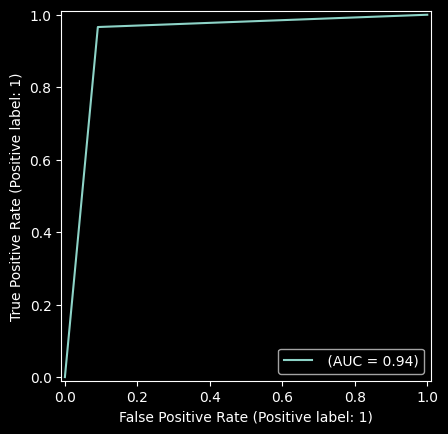

In [33]:
preds = xg_cl_ajustado.predict(x_teste)
avaliar_modelo(preds, y_teste, plotar_grafico=True)

# Incorporando XGBoost em pipelines

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('onehot', OneHotEncoder()),
    #('oversample', SMOTE()),
    ('xgb', XGBClassifier())
])

xgb_param_grid = {
    'xgb__learning_rate': [0.1, 0.2, 0.3],
    'xgb__max_depth': [1, 2, 4, 6, 10],
    'xgb__colsample_bytree': [0.1, 0.5, 1],
    'xgb__n_estimators': [10, 25, 50]
}

grid_search_cv = GridSearchCV(estimator=pipeline, param_grid=xgb_param_grid,
                              scoring='accuracy', cv=4, verbose=1)

grid_search_cv.fit(x, y)

Fitting 4 folds for each of 135 candidates, totalling 540 fits


c:\Users\gabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('onehot', OneHotEncoder()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=Non...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__colsample_bytree': [0.1, 0.5, 1],
                         'xgb__learning_rate': [0.1, 0.2, 0.3],
                         'xgb__max_depth': [1, 2, 4, 6, 10],
                         'xgb__n_estimators': [10, 25, 50]},
             scoring='accuracy', verbose=1)

In [45]:
print('Acuracia:', grid_search_cv.best_score_)
print('Melhor estimador:', grid_search_cv.best_estimator_)

Acuracia: nan
Melhor estimador: Pipeline(steps=[('onehot', OneHotEncoder()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.1, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=1, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None

# Salvando modelo

In [ ]:
import joblib
joblib.dump(grid_search_cv, 'modelo_pipeline.pkl')

In [ ]:
previsoes = modelo.predict(novos_pacientes)
probabilidades = modelo.predict_proba(novos_pacientes)

df_novos_pacientes = pd.DataFrame(novos_pacientes)
df_novos_pacientes['previsoes'] = previsoes

df_novos_pacientes